In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv(r"/content/drive/MyDrive/Project BT19MEC022/Dataset/Nagpur 2017-03-12 to 2019-11-12.csv")

In [4]:
df.columns


Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

In [5]:
df.describe()
data=df.drop(columns=['snow','snowdepth','feelslikemax','feelslikemin','feelslike','windgust'],axis=1)

In [6]:
data.head()

,name,datetime,tempmax,tempmin,temp,dew,humidity,precip,precipprob,precipcover,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Nagpur,2017-03-12,32.0,20.6,26.1,3.4,23.7,0.0,0,0.00,...,25.7,10,NaN,2017-03-12T06:24:56,2017-03-12T18:22:08,0.50,Clear,Clear conditions throughout the day.,clear-day,"42939099999,VANP,42867099999"
1,Nagpur,2017-03-13,33.0,15.2,24.6,3.3,26.0,0.0,0,0.00,...,26.0,10,NaN,2017-03-13T06:24:03,2017-03-13T18:22:28,0.51,Clear,Clear conditions throughout the day.,clear-day,"42939099999,VANP,42867099999,remote"
2,Nagpur,2017-03-14,34.0,15.0,25.0,4.6,30.4,0.0,0,0.00,...,25.0,10,NaN,2017-03-14T06:23:10,2017-03-14T18:22:48,0.52,Clear,Clear conditions throughout the day.,clear-day,"42939099999,VANP,42867099999,remote"
3,Nagpur,2017-03-15,34.0,18.0,26.5,5.7,27.8,0.0,0,0.00,...,24.3,10,NaN,2017-03-15T06:22:17,2017-03-15T18:23:08,0.54,Clear,Clear conditions throughout the day.,clear-day,"42939099999,VANP,42867099999"
4,Nagpur,2017-03-16,35.0,21.0,27.5,6.6,28.0,1.7,100,29.17,...,22.4,9,NaN,2017-03-16T06:21:23,2017-03-16T18:23:28,0.57,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"42939099999,VANP,42867099999"


In [7]:
numeric_features = data.select_dtypes(include=np.number)
numeric_features.columns


Index(['tempmax', 'tempmin', 'temp', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk',
       'moonphase'],
      dtype='object')

In [8]:
correlation = numeric_features.corr()

#examining the correlation of wind speed with other numeric features

print(correlation["windspeed"].sort_values(ascending=False),"\n")







windspeed           1.000000
tempmin             0.403282
temp                0.348636
winddir             0.325621
cloudcover          0.278697
precipprob          0.260478
tempmax             0.253180
precipcover         0.237021
visibility          0.235554
dew                 0.143528
precip              0.126898
solarenergy         0.113025
solarradiation      0.112486
uvindex             0.032346
moonphase          -0.005082
humidity           -0.039069
sealevelpressure   -0.458217
severerisk               NaN
Name: windspeed, dtype: float64 



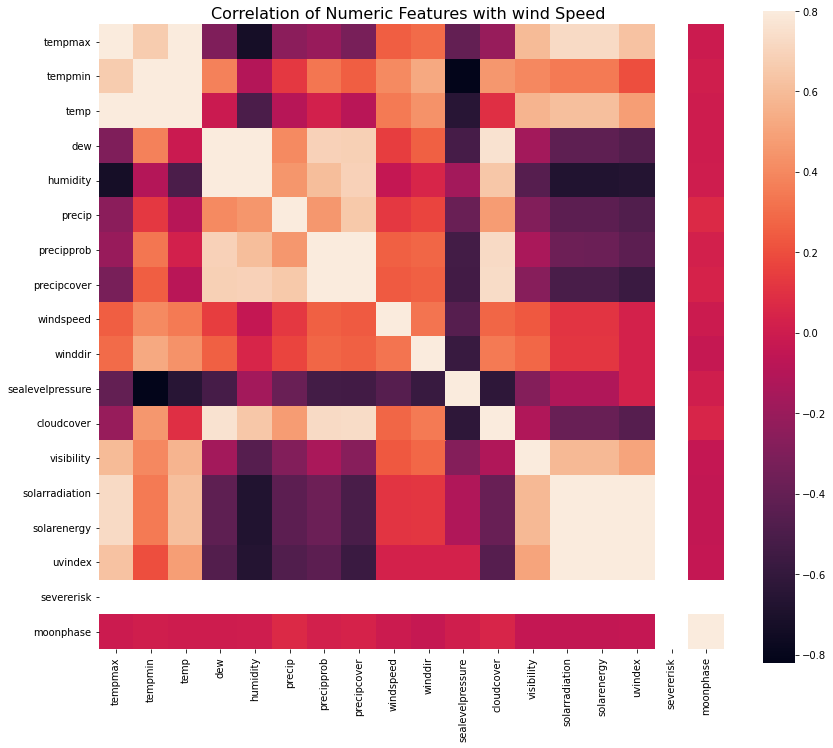

In [9]:
f, ax = plt.subplots(figsize = (14,12))
plt.title("Correlation of Numeric Features with wind Speed ",y=1,size = 16)
sns.heatmap(correlation,square=True, vmax =0.8)



Index(['windspeed', 'tempmin', 'temp', 'winddir', 'cloudcover', 'precipprob',
       'tempmax', 'precipcover', 'visibility', 'dew'],
      dtype='object')


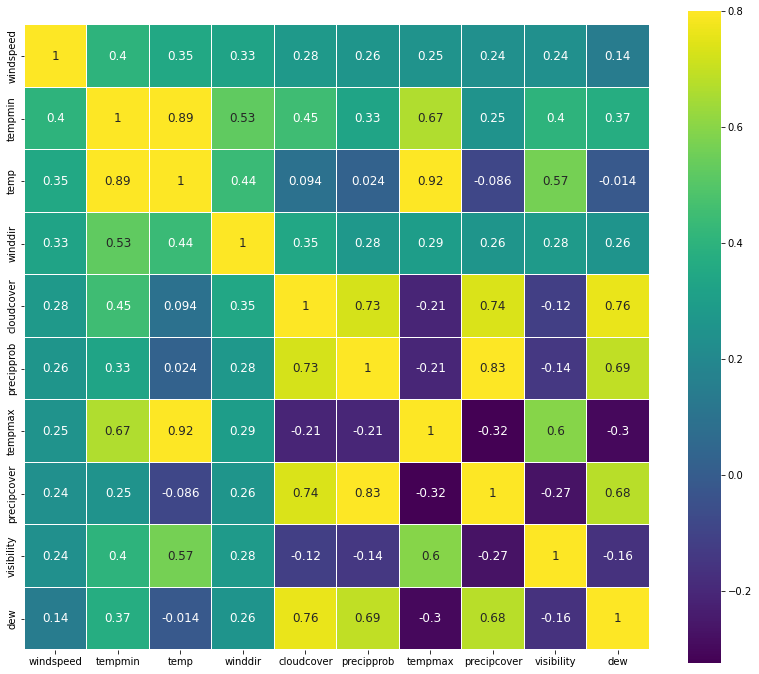

In [10]:
#multi colinearity destroys model performance because of low variance
#choosing top 10 features
k=10
cols = correlation.nlargest(k,'windspeed')['windspeed'].index
print(cols)
#pearson correlation
cm = np.corrcoef(data[cols].values.T)
f,ax = plt.subplots(figsize=(14,12))
sns.heatmap(cm,vmax=.8,linewidths=0.01,square=True,annot=True,cmap='viridis',linecolor='white',xticklabels=cols.values, annot_kws={"size":12},yticklabels=cols.values)


In [11]:
list_columns = ['winddir','tempmin','temp','precipprob','cloudcover','tempmax','precipcover','dew','precip']
X = data[list_columns]
Y = data['windspeed']
data_whole = data[['winddir','tempmin','temp','precipprob','cloudcover','tempmax','precipcover','dew','precip','windspeed']]


In [12]:
#dates = df['datetime']
#X_new = pd.concat([X,dates],axis=1)
#X_new.head()
#X_new.shape


In [14]:
#from google.colab import files
#files.download("X_new.csv")

#from google.colab import files
#files.download("Y.csv")

In [15]:
dates = df['datetime']
whole = pd.concat([data_whole,dates],axis=1)
whole.head()
whole.shape

(976, 11)

In [16]:
whole.head()

,winddir,tempmin,temp,precipprob,cloudcover,tempmax,precipcover,dew,precip,windspeed,datetime
0,354.0,20.6,26.1,0,2.1,32.0,0.00,3.4,0.0,18.4,2017-03-12
1,61.4,15.2,24.6,0,4.2,33.0,0.00,3.3,0.0,12.6,2017-03-13
2,72.3,15.0,25.0,0,0.0,34.0,0.00,4.6,0.0,11.2,2017-03-14
3,75.1,18.0,26.5,0,0.0,34.0,0.00,5.7,0.0,12.2,2017-03-15
4,152.8,21.0,27.5,100,20.9,35.0,29.17,6.6,1.7,14.8,2017-03-16


In [17]:
whole.set_index('datetime',drop=True,inplace=True)

In [23]:
whole.tail()

,winddir,tempmin,temp,precipprob,cloudcover,tempmax,precipcover,dew,precip,windspeed
datetime,,,,,,,,,,
2019-11-08,52.3,21.6,25.2,0,35.1,31.1,0.0,20.5,0.0,7.6
2019-11-09,16.8,20.2,24.5,0,18.0,29.0,0.0,16.8,0.0,11.2
2019-11-10,17.5,18.9,24.0,0,8.4,29.9,0.0,17.8,0.0,7.6
2019-11-11,48.5,19.3,23.9,0,6.5,29.0,0.0,17.1,0.0,9.4
2019-11-12,82.8,17.6,22.9,0,9.1,29.0,0.0,16.0,0.0,14.8


In [20]:
whole.to_csv("Complete_data2.csv")

from google.colab import files
files.download("Complete_data2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
df2 = pd.read_csv(r"/content/drive/MyDrive/Project BT19MEC022/Dataset/Nagpur.csv")
result = df.append(df2)
display(result)



,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Nagpur,2017-03-12,32.0,20.6,26.1,29.8,20.6,25.3,3.4,23.7,...,25.7,10,NaN,2017-03-12T06:24:56,2017-03-12T18:22:08,0.50,Clear,Clear conditions throughout the day.,clear-day,"42939099999,VANP,42867099999"
1,Nagpur,2017-03-13,33.0,15.2,24.6,30.7,15.2,23.9,3.3,26.0,...,26.0,10,NaN,2017-03-13T06:24:03,2017-03-13T18:22:28,0.51,Clear,Clear conditions throughout the day.,clear-day,"42939099999,VANP,42867099999,remote"
2,Nagpur,2017-03-14,34.0,15.0,25.0,31.5,15.0,24.2,4.6,30.4,...,25.0,10,NaN,2017-03-14T06:23:10,2017-03-14T18:22:48,0.52,Clear,Clear conditions throughout the day.,clear-day,"42939099999,VANP,42867099999,remote"
3,Nagpur,2017-03-15,34.0,18.0,26.5,31.8,18.0,25.7,5.7,27.8,...,24.3,10,NaN,2017-03-15T06:22:17,2017-03-15T18:23:08,0.54,Clear,Clear conditions throughout the day.,clear-day,"42939099999,VANP,42867099999"
4,Nagpur,2017-03-16,35.0,21.0,27.5,32.6,21.0,26.6,6.6,28.0,...,22.4,9,NaN,2017-03-16T06:21:23,2017-03-16T18:23:28,0.57,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"42939099999,VANP,42867099999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NAGPUR,2022-08-04,33.1,25.0,27.9,42.3,25.0,32.4,25.9,89.5,...,20.4,9,60.0,2022-08-04T05:48:23,2022-08-04T18:51:03,0.20,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"42939099999,VANP,42867099999"
996,NAGPUR,2022-08-05,33.0,25.0,28.6,42.1,25.0,33.5,25.8,85.8,...,23.3,9,60.0,2022-08-05T05:48:45,2022-08-05T18:50:29,0.25,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"VANP,42867099999"
997,NAGPUR,2022-08-06,34.0,25.0,27.8,43.4,25.0,31.2,25.5,88.4,...,22.5,10,60.0,2022-08-06T05:49:07,2022-08-06T18:49:54,0.31,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,VANP
998,NAGPUR,2022-08-07,33.0,24.6,26.9,43.7,24.6,29.4,25.0,90.1,...,8.9,4,60.0,2022-08-07T05:49:28,2022-08-07T18:49:19,0.36,"Rain, Partially cloudy",Partly cloudy throughout the day with storms p...,rain,"VANP,remote"


In [22]:
result.to_csv("Complete_datafinal.csv")

from google.colab import files
files.download("Complete_datafinal.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>